# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [1]:
# Import necessary libraries 🔧


In [3]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧


## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [10]:
# Add code here 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully.")


Libraries imported successfully.


In [11]:
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

missing_data = missing_data[missing_data['Null Count'] > 0].sort_values(by='Null Count', ascending=False)

print("Missing Values Summary (sorted by Null Count):")
print(missing_data)

Missing Values Summary (sorted by Null Count):
                              Null Count  Null Percentage
license                             6801       100.000000
calendar_updated                    6801       100.000000
neighbourhood_group_cleansed        6801       100.000000
neighbourhood                       5220        76.753419
neighborhood_overview               5220        76.753419
review_scores_value                 3216        47.287164
reviews_per_month                   3216        47.287164
review_scores_cleanliness           3216        47.287164
review_scores_checkin               3216        47.287164
review_scores_accuracy              3216        47.287164
first_review                        3216        47.287164
review_scores_rating                3216        47.287164
last_review                         3216        47.287164
review_scores_location              3216        47.287164
review_scores_communication         3216        47.287164
host_about               

/tmp/ipython-input-661798623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y='Null Percentage', data=missing_data, palette='viridis')


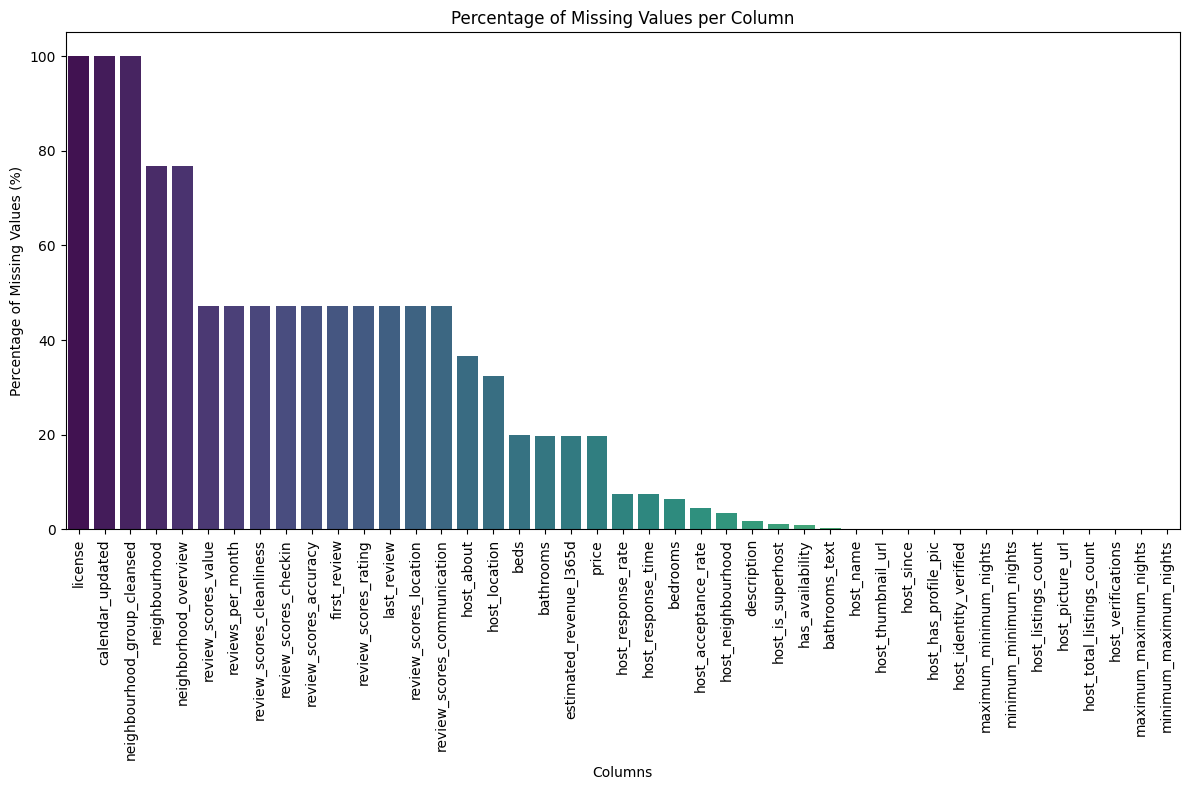

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index, y='Null Percentage', data=missing_data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. The top 3 are license, calander updated and neighbourhood group cleansed.

2. Honestly any missing values can create business issues if mishandled, some will be more severe though such as bed counts being displayed wrong or upated calanders.

3. We could safely ignore or drop the first review as the other reviews are still loading.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [35]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("listings (1).csv")  # change filename

print("\n--- Columns with >50% Missing ---")
print(df.columns[df.isnull().mean() > 0.5].tolist())

print("\n--- Near Zero Variance Columns (>99% same value) ---")
nzv = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True, dropna=True)
    if len(top_freq) > 0 and top_freq.iloc[0] > 0.99:
        nzv.append(col)
print(nzv)

print("\n--- Highly Correlated Numeric Columns (r > 0.95) ---")
corr = df.select_dtypes(include=np.number).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
print(high_corr)

print("\n--- Likely ID Columns (>98% unique values) ---")
likely_ids = [col for col in df.columns if df[col].nunique() / len(df) > 0.98]
print(likely_ids)



--- Columns with >50% Missing ---
['neighborhood_overview', 'neighbourhood', 'neighbourhood_group_cleansed', 'calendar_updated', 'license']

--- Near Zero Variance Columns (>99% same value) ---
['scrape_id', 'has_availability']

--- Highly Correlated Numeric Columns (r > 0.95) ---
['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'availability_eoy', 'calculated_host_listings_count_private_rooms']

--- Likely ID Columns (>98% unique values) ---
['id', 'listing_url']


In [39]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103760,https://www.airbnb.com/rooms/103760,20250923203502,2025-09-24,city scrape,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",NaN,https://a0.muscache.com/pictures/815221/056993...,304876,...,4.63,4.72,4.41,NaN,f,1,1,0,0,1.82
1,248140,https://www.airbnb.com/rooms/248140,20250923203502,2025-09-24,city scrape,Bright Studio - Soho - Central HK,Our bright studio apartment is perfect for vis...,The local neighbourhood is quiet and relaxing....,https://a0.muscache.com/pictures/4e5463bc-38be...,1300549,...,4.98,4.76,4.80,NaN,f,1,1,0,0,1.35
2,263081,https://www.airbnb.com/rooms/263081,20250923203502,2025-09-23,city scrape,"3 睡房, 2500 平方呎 有工人 Family Friendly! 在中環半山 有車","Mid Level on the top of central, Next to the m...","We are in the most luxury area of HK, conduit ...",https://a0.muscache.com/pictures/7348025/73278...,1370155,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,306515,https://www.airbnb.com/rooms/306515,20250923203502,2025-09-24,city scrape,"HongKong,Central Bright Double Room",NaN,NaN,https://a0.muscache.com/pictures/3335548/00a8d...,1576511,...,4.84,4.89,4.79,NaN,f,1,1,0,0,0.11
4,378047,https://www.airbnb.com/rooms/378047,20250923203502,2025-09-24,previous scrape,LUXURY HONG KONG COUNTRY COW SHED,Your bijoux getaway is a one story cottage in ...,"We are in the South Lantau foot hills, 20 min ...",https://a0.muscache.com/pictures/hosting/Hosti...,1805628,...,4.94,4.52,4.62,NaN,f,1,1,0,0,0.51


### ✍️ Your Response: 🔧
1.I will be dropping neighnorhood_overview, neighborhood group cleaned and neighbourhood. This is because they arent as neccessary for the dataset and if they are returning wrong values can lead to misinformation in the booking process.

2. These arent super useful anyways because we dont care about neighborhood groups or what is going on as much in a neighborhood when booking an airbnb especially if much of the information is null or missing.

3. If this information was put in incorrectly it can lead to misleading information and people booking a airbnb under the assumption the neighborhood was in an area it isn't.



## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [32]:
# Your code for converting column data types 🔧

# Fill missing values in 'bathrooms' with the median
median_bathrooms = df['bathrooms'].median()
df['bathrooms'] = df['bathrooms'].fillna(median_bathrooms)
print(f"Missing values in 'bathrooms' filled with median: {median_bathrooms}")

# Fill missing values in 'beds' with the median
median_beds = df['beds'].median()
df['beds'] = df['beds'].fillna(median_beds)
print(f"Missing values in 'beds' filled with median: {median_beds}")

# Verify that missing values are handled
print("\nMissing values after imputation:")
print(df[['bathrooms', 'beds']].isnull().sum())

Missing values in 'bathrooms' filled with median: 1.0
Missing values in 'beds' filled with median: 1.0

Missing values after imputation:
bathrooms    0
beds         0
dtype: int64


### ✍️ Your Response: 🔧
1. I cleaned the issue with beds and bathrooms.

2. I usef a median fill for both to fill in the missing values of the beds and bathrooms.

3. There can be many units that do not fit within the median and therfore have oncorrect data being displayed on the site.


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


Data type of 'price' column after cleaning:
float64

Summary statistics for cleaned 'price' column:
count      5465.000000
mean        816.503385
std        2850.318773
min           1.000000
25%         217.000000
50%         428.000000
75%         875.000000
max      150000.000000
Name: price, dtype: float64


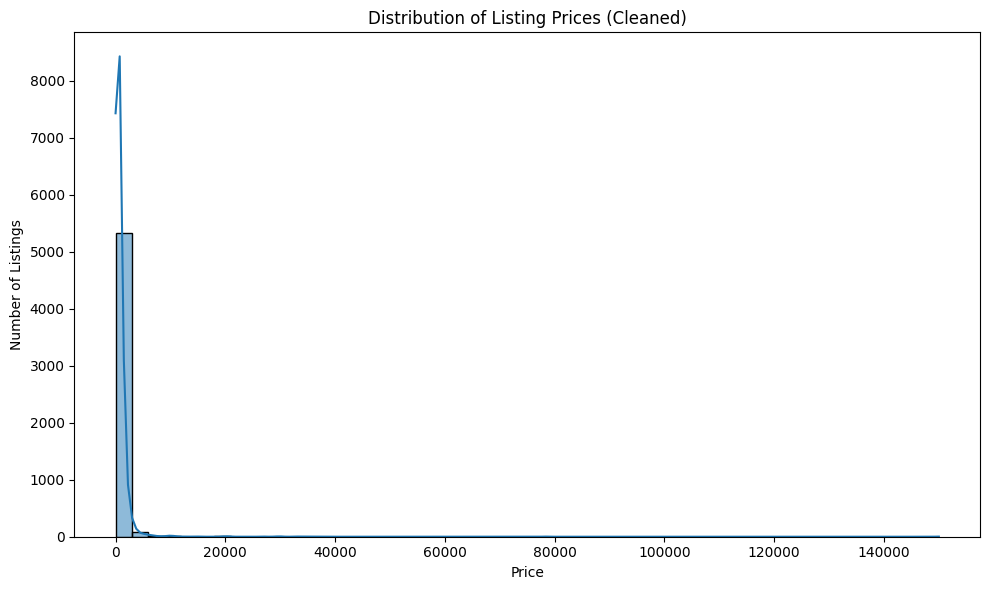

In [23]:
# Clean and convert the 'price' column 🔧

# Remove '$' and ',' from the 'price' column and convert to numeric
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce') # Added errors='coerce' here

print("Data type of 'price' column after cleaning:")
print(df['price'].dtype)

# Summarize the cleaned 'price' column to check the work
print("\nSummary statistics for cleaned 'price' column:")
print(df['price'].describe())

# Plot a histogram to visualize the distribution of the cleaned 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), bins=50, kde=True) # Added .dropna() to avoid plotting NaN
plt.title('Distribution of Listing Prices (Cleaned)')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. I fixed the price column.

2. I changed it from a $ to a numeric value so it would populate in our chart easier. I used replace functions to replac the dollar signs.

3. The data is now able to be converted easier and used as it is in a numeric form.

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [40]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of exact duplicate rows found: {duplicate_rows}")

# Check for duplicate 'id' values
duplicate_ids = df['id'].duplicated().sum()
print(f"Number of duplicate 'id' values found: {duplicate_ids}")

if duplicate_rows > 0:
    print(f"\nRemoving {duplicate_rows} exact duplicate rows...")
    df.drop_duplicates(inplace=True)
    print("Exact duplicate rows removed.")

if duplicate_ids > 0:
    print(f"\nRemoving {duplicate_ids} duplicate 'id' entries, keeping the first occurrence...")
    # Assuming 'id' should be unique, keep the first entry for each id
    df.drop_duplicates(subset=['id'], inplace=True)
    print("Duplicate 'id' entries removed.")

print(f"\nDataFrame shape after checking for duplicates: {df.shape}")

Number of exact duplicate rows found: 0
Number of duplicate 'id' values found: 0

DataFrame shape after checking for duplicates: (6801, 79)


### ✍️ Your Response: 🔧 🔧
1. I found no duplicates.

2. I decided to keep everything because there were no duplicates.

3.Duplicates are extrrmelt risky as it can come across to users as a scam, the page might not populate right, or if a booking is complete and only displays on one site it can lead to double bookings.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [46]:
# export csv here 🔧
df.to_csv('cleaned_airbnb_data_6.csv', index=False)
print("Cleaned data exported to 'cleaned_airbnb_data_6.csv'")

Cleaned data exported to 'cleaned_airbnb_data_6.csv'


## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. Defintely choosing what was deemed "important" and what not without more knowledge into what is neccesary.
2. I decided to keep most data except for duplicates which I got rid of. I wanted to make sure most data stayed included as it could be helpful.
3. The business now has a clear set of data that can correctly display airbnb sources to help with marketing or sales initiatives.   
4. I would definetely look more into the data to make sure everything was accurate.
5. This related because I am understanding code and analyzing large datatasets.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [53]:
!jupyter nbconvert --to html "assignment_06_data_cleaning.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_06_data_cleaning.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru

In [ ]:
!ls -lt /content/